# Exploring Chinese Radicals

A Chinese radical (Chinese: 部首; pinyin: bùshǒu; literally: "section header") is a graphical component of a Chinese character under which the character is traditionally listed in a Chinese dictionary.

<img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcTnD0O71vv1AyRK-BW26Y6ddDXL1zuBBFEWxOg1WmxkW7djImo"/>

In [39]:
import pandas as pd
import numpy as np
from neo4j.v1 import GraphDatabase, basic_auth
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Neo4j driver and client
driver = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j", "cogch"))
session = driver.session()

In [3]:
# Cypher query that groups characters by its radical
CYPHER_GROUP_RADICALS = """
MATCH (rad:Character)<-[rel:HAS_RADICAL]-(c:Character)
WITH rad.char as radical, collect(distinct c.char) as chars
RETURN radical, length(chars) as cnt, chars
ORDER BY cnt DESC
"""

In [128]:
query = session.run(CYPHER_GROUP_RADICALS)
query = list(query)

In [129]:
dframe = pd.DataFrame({
    'radical': [e[0] for e in query],
    'count': [e[1] for e in query],
    'chars': [e[2] for e in query]
})
del query

In [130]:
dframe.head()

,chars,count,radical
0,"[什, 但, 侪, 催, 偿, 倨, 傲, 儒, 件, 仙, 侏, 俚, 侈, 俭, 休, ...",116,人
1,"[渗, 渐, 派, 浪, 浦, 沼, 汆, 泽, 漫, 漆, 河, 滩, 津, 滴, 浆, ...",104,水
2,"[摒, 搭, 掉, 挡, 扔, 拾, 拦, 扯, 挠, 掩, 扶, 擀, 撒, 拐, 搂, ...",100,手
3,"[嗓, 哄, 啇, 唾, 唱, 啼, 唐, 吵, 喉, 嚣, 哗, 喧, 嘈, 吨, 呫, ...",94,口
4,"[桑, 村, 桂, 杖, 桼, 梅, 椎, 柱, 未, 柔, 橡, 横, 枝, 桁, 柴, ...",79,木


In [37]:
len(dframe)

181

## Measuring the Radical Popularity

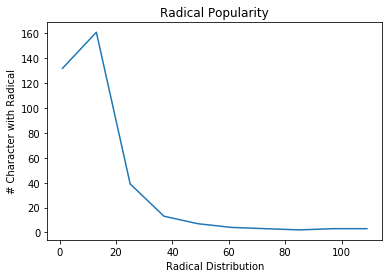

In [99]:
MIN = dframe['count'].min()
MAX = dframe['count'].max()
MEAN = dframe['count'].mean()

Y = []
X = []

for x in range(MIN, MAX, int(MEAN)):
    X.append(x)
    Y.append(len(dframe[(dframe['count'] > x - MEAN) & (dframe['count'] < x + MEAN)]))
    
plt.plot(X, Y)

plt.ylabel("# Character with Radical")
plt.xlabel("Radical Distribution")
plt.title("Radical Popularity")

plt.show()

We can see that most of sampled Chinese characters share about 40 very common radicals. Which are the following:

In [103]:
print(", ".join(dframe['radical'][:40]))

人, 水, 手, 口, 木, 心, 艸, 肉, 言, 辵, 糸, 刀, 土, 宀, 日, 金, 貝, 火, 女, 一, 阜, 攵, 大, 竹, 山, 广, 目, 力, 田, 石, 禾, 衣, 頁, 犬, 十, 玉, 巾, 又, 彳, 子


## Clustering the Characters into Radical Groups